In [1]:
import wooldridge as woo
import pandas as pd
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [10, 5]

# Interactive Session 7

In [2]:
sleep75=woo.data('sleep75')
woo.data('sleep75',description=True)

name of dataset: sleep75
no of variables: 34
no of observations: 706

+----------+--------------------------------+
| variable | label                          |
+----------+--------------------------------+
| age      | in years                       |
| black    | =1 if black                    |
| case     | identifier                     |
| clerical | =1 if clerical worker          |
| construc | =1 if construction worker      |
| educ     | years of schooling             |
| earns74  | total earnings, 1974           |
| gdhlth   | =1 if in good or excel. health |
| inlf     | =1 if in labor force           |
| leis1    | sleep - totwrk                 |
| leis2    | slpnaps - totwrk               |
| leis3    | rlxall - totwrk                |
| smsa     | =1 if live in smsa             |
| lhrwage  | log hourly wage                |
| lothinc  | log othinc, unless othinc < 0  |
| male     | =1 if male                     |
| marr     | =1 if married                  |
| prot    

In [3]:
mod=ols('sleep~totwrk+educ+age+male',data=sleep75).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                  sleep   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     24.26
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           8.02e-19
Time:                        09:16:21   Log-Likelihood:                -5259.8
No. Observations:                 706   AIC:                         1.053e+04
Df Residuals:                     701   BIC:                         1.055e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3642.4666    111.844     32.567      0.0

In [4]:
sleep75['l_sleep']=np.log(sleep75['sleep'])

mod=ols('l_sleep~totwrk+male',data=sleep75).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                l_sleep   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     40.20
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           2.94e-17
Time:                        09:16:21   Log-Likelihood:                 372.64
No. Observations:                 706   AIC:                            -739.3
Df Residuals:                     703   BIC:                            -725.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.1797      0.013    613.604      0.0

In [5]:
sleep75['l_totwrk']=np.log(sleep75['totwrk'])
#When zero is logged it shows up as -inf so we want to remove this
s=sleep75['totwrk']>0
sleep75_=sleep75[s]

mod=ols('sleep~l_totwrk+male',data=sleep75_).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                  sleep   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     33.05
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           2.04e-14
Time:                        09:16:21   Log-Likelihood:                -5042.4
No. Observations:                 676   AIC:                         1.009e+04
Df Residuals:                     673   BIC:                         1.010e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5130.1059    231.437     22.166      0.0

C:\Users\aes05kgb\Anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [6]:
mod=ols('l_sleep~l_totwrk+male',data=sleep75_).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                l_sleep   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     28.35
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           1.51e-12
Time:                        09:16:21   Log-Likelihood:                 347.58
No. Observations:                 676   AIC:                            -689.2
Df Residuals:                     673   BIC:                            -675.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.6767      0.080    108.821      0.0

# Sildes 7A

In [7]:
data=pd.read_excel('Galtondata.xlsx')
data

Family  Father  Mother Gender  Height  Kids
0        1    78.5    67.0      M    73.2     4
1        1    78.5    67.0      F    69.2     4
2        1    78.5    67.0      F    69.0     4
3        1    78.5    67.0      F    69.0     4
4        2    75.5    66.5      M    73.5     4
..     ...     ...     ...    ...     ...   ...
893   136A    68.5    65.0      M    68.5     8
894   136A    68.5    65.0      M    67.7     8
895   136A    68.5    65.0      F    64.0     8
896   136A    68.5    65.0      F    63.5     8
897   136A    68.5    65.0      F    63.0     8

[898 rows x 6 columns]

In [8]:
data['DGender_1']=(data['Gender']=='M').astype(int)
data['DGender_2']=(data['Gender']=='F').astype(int)
data

Family  Father  Mother Gender  Height  Kids  DGender_1  DGender_2
0        1    78.5    67.0      M    73.2     4          1          0
1        1    78.5    67.0      F    69.2     4          0          1
2        1    78.5    67.0      F    69.0     4          0          1
3        1    78.5    67.0      F    69.0     4          0          1
4        2    75.5    66.5      M    73.5     4          1          0
..     ...     ...     ...    ...     ...   ...        ...        ...
893   136A    68.5    65.0      M    68.5     8          1          0
894   136A    68.5    65.0      M    67.7     8          1          0
895   136A    68.5    65.0      F    64.0     8          0          1
896   136A    68.5    65.0      F    63.5     8          0          1
897   136A    68.5    65.0      F    63.0     8          0          1

[898 rows x 8 columns]

In [9]:
mod=ols('Height~DGender_1+Mother+Father',data=data).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                 Height   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     529.0
Date:                Sat, 07 Jan 2023   Prob (F-statistic):          1.33e-197
Time:                        09:16:22   Log-Likelihood:                -1961.4
No. Observations:                 898   AIC:                             3931.
Df Residuals:                     894   BIC:                             3950.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.3448      2.747      5.586      0.0

In [10]:
#Python is happy to have categorical string variables entered so there is no need for dummies
mod=ols('Height~Gender+Mother+Father',data=data).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                 Height   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     529.0
Date:                Sat, 07 Jan 2023   Prob (F-statistic):          1.33e-197
Time:                        09:16:22   Log-Likelihood:                -1961.4
No. Observations:                 898   AIC:                             3931.
Df Residuals:                     894   BIC:                             3950.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      15.3448      2.747      5.586      

# Slides 7 B,C

In [11]:
#Note that this will generate data different from what is in the notes because it will give a different result each time
#However the strong collinearity effect will always be present, You can investigate the impact of the sample size rather 
#than reading in the data in the next cell 
sample_size=100
x1=np.random.normal(0,1,sample_size)
x2=x1+.01*np.random.normal(0,1,sample_size)
y=x1+x2+np.random.normal(0,1,sample_size)

data=pd.DataFrame([y,x1,x2]).T
data.columns=['y','x1','x2']


In [12]:
#Alternatively this is the data generated for the notes
data=pd.read_excel('collinearitydata.xlsx')

In [13]:
mod=ols('y~x1+x2',data=data).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     272.0
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           1.67e-40
Time:                        09:16:26   Log-Likelihood:                -135.04
No. Observations:                 100   AIC:                             276.1
Df Residuals:                      97   BIC:                             283.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0180      0.095     -0.189      0.8

In [14]:
#To get the variance inflation factores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

df=data[['x1','x2']]
df = add_constant(df)
pd.Series([vif(df.values, i) for i in range(df.shape[1])], index=df.columns)


const        1.008802
x1       11003.013806
x2       11003.013806
dtype: float64

In [15]:
mod=ols('y~x1',data=data).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     545.6
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           7.72e-42
Time:                        09:16:26   Log-Likelihood:                -135.35
No. Observations:                 100   AIC:                             274.7
Df Residuals:                      98   BIC:                             279.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0153      0.095     -0.161      0.8

In [16]:
mod=ols('y~x2',data=data).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     547.6
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           6.64e-42
Time:                        09:16:26   Log-Likelihood:                -135.20
No. Observations:                 100   AIC:                             274.4
Df Residuals:                      98   BIC:                             279.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0161      0.095     -0.170      0.8

In [17]:

data=pd.read_excel('collinearitydata.xlsx',sheet_name='Sheet3')

In [18]:
mod=ols('logproduction~loglabour+logsize',data).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:          logproduction   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     38.64
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           4.54e-13
Time:                        09:16:30   Log-Likelihood:                 7.8333
No. Observations:                 100   AIC:                            -9.667
Df Residuals:                      97   BIC:                            -1.851
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1473      1.116      0.132      0.8

<AxesSubplot:xlabel='logsize', ylabel='loglabour'>

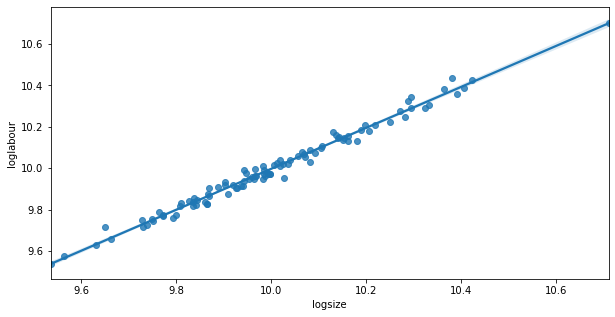

In [19]:
import seaborn as sns
sns.regplot(data=data,y='loglabour',x='logsize')